In [128]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
from numpy import array

In [129]:
dist_df = pd.read_csv('Data/DATA_Texas_District_v2_22.csv')
reg_df = pd.read_csv('Data/RegressionData.csv')
avg_df = pd.read_csv('Data/AverageScores.csv')

In [130]:
reg_df

,Unnamed: 0,CARES ESSER I 20 NORM,CRRSA ESSER II 21 NORM,ARP ESSER III 21 NORM,ESSER-SUPP 22 NORM,ESSER-SUPP 23 NORM,DISTRICT_N,Agency Name,County #,Average Score Math Asian Grade 3 2018-2019,...,Average Score Reading T1 Grade 8 2020-2021,Average Score Reading T1 Grade 3 2021-2022,Average Score Reading T1 Grade 4 2021-2022,Average Score Reading T1 Grade 5 2021-2022,Average Score Reading T1 Grade 6 2021-2022,Average Score Reading T1 Grade 7 2021-2022,Average Score Reading T1 Grade 8 2021-2022,Label Math 2019-2022,Label Reading 2019-2022,Label Overall 2019-2022
0,0,576.525680,2586.580060,5810.966767,0.000000,0.000000,54901,CROSBYTON CISD,48107,NaN,...,0.902747,0.892836,0.886592,0.864803,0.866553,0.899676,0.888052,No Unexpected Change,No Unexpected Change,No Unexpected Change
1,1,266.610860,1065.502262,2393.742081,0.000000,0.000000,63903,SPUR ISD,48125,NaN,...,0.888462,0.882601,0.976373,0.940103,0.934128,0.940129,0.925727,Gain,Gain,Gain
2,2,559.918288,2127.642023,4779.929961,0.000000,0.000000,69901,ROCKSPRINGS ISD,48137,NaN,...,0.892308,0.867550,0.853514,0.857958,0.877910,0.888350,0.884822,Loss,Loss,Loss
3,3,0.000000,0.000000,0.000000,482.393548,441.903226,177903,BLACKWELL CISD,48353,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gain,Gain,Gain
4,4,194.881081,771.654054,1733.589189,0.000000,0.000000,217901,ASPERMONT ISD,48433,NaN,...,NaN,0.916918,0.941524,0.941244,NaN,NaN,NaN,No Unexpected Change,Gain,Gain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,384.022769,1669.324294,3750.276340,0.000000,0.000000,71905,YSLETA ISD,48141,0.997582,...,0.898901,0.882601,0.905493,0.911010,0.902328,0.901834,0.916577,Loss,Loss,Loss
1009,1009,467.912991,2261.326437,5080.258594,0.000000,0.000000,253901,ZAPATA COUNTY ISD,48505,NaN,...,0.897802,0.859723,0.874779,0.875642,0.864850,0.869471,0.891819,Loss,Loss,Loss
1010,1010,332.890365,1742.694352,3915.106312,0.000000,0.000000,3906,ZAVALLA ISD,48005,NaN,...,0.890110,0.860927,0.923804,0.891614,0.940375,0.919633,0.913886,No Unexpected Change,Gain,Gain
1011,1011,280.183962,1152.316038,2588.768868,0.000000,0.000000,25906,ZEPHYR ISD,48049,NaN,...,0.935165,0.909091,0.910809,0.929264,0.920500,0.922330,0.895587,No Unexpected Change,No Unexpected Change,No Unexpected Change


In [132]:
avg_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [133]:
avg_df

,DISTRICT_N,AVG_Math_2022,AVG_Reading_2022,AVG_Math_2019,AVG_Reading_2019,AVG_Math_2021,AVG_Reading_2021
0,57816,0.815264,0.876329,0.836182,0.879526,0.811145,0.882282
1,57829,0.819228,0.858441,0.848756,0.866373,0.804116,0.860396
2,101871,0.403566,0.454590,0.419714,0.445924,0.404389,0.450577
3,109901,0.899357,0.942014,0.919769,0.937297,0.897280,0.939043
4,95901,0.878021,0.917183,0.874632,0.908641,0.863912,0.916660
...,...,...,...,...,...,...,...
1155,62904,0.838596,0.879949,0.844890,0.876720,0.818145,0.871578
1156,71905,0.860885,0.903217,0.879373,0.905574,0.818961,0.887423
1157,253901,0.835990,0.872714,0.850835,0.882555,0.801787,0.860655
1158,3906,0.843025,0.908373,0.866702,0.893549,0.848231,0.908511


In [134]:
reg_df = reg_df.merge(avg_df, how='inner',on='DISTRICT_N')

In [135]:
dist_df

,DISTRICT_N,County #,Locale,Labor Force Diff,Employed Diff,Unemployed Level Diff,Unemployed Rate Diff,Median Age 10,Median Age Male 10,Median Age Female 10,...,AVG_Reading_2021,Label_Math (19-22),Label_Reading (19-22),Label_All (19-22),Label_Math (19-21),Label_Reading (19-21),Label_All (19-21),Label_Math (21-22),Label_Reading (21-22),Label_All (21-22)
0,57816,48113,11-City: Large,-0.117687,-0.046919,-0.913279,-0.375000,34.434152,33.430138,35.308688,...,0.882282,-1,0,-1,0,0,0,-1,-1,-1
1,57829,48113,11-City: Large,-0.117687,-0.046919,-0.913279,-0.375000,34.434152,33.430138,35.308688,...,0.860396,-1,-1,-1,-1,0,-1,0,0,0
2,101871,48201,11-City: Large,-0.034466,0.365597,-0.835562,-0.400000,34.169963,33.293470,34.979664,...,0.450577,-1,1,0,0,1,0,-1,1,0
3,109901,48217,42-Rural: Distant,-0.036856,-0.019837,-0.359857,-0.340000,41.241667,40.200000,42.250000,...,0.939043,-1,0,0,0,0,0,-1,0,0
4,95901,48189,31-Town: Fringe,0.010575,0.027969,-0.258287,-0.262295,33.223333,32.320000,34.273333,...,0.916660,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,62904,48123,43-Rural: Remote,0.022413,0.046104,-0.442982,-0.458333,42.700000,40.864706,44.358824,...,0.871578,0,0,0,0,0,0,0,1,0
1156,71905,48141,11-City: Large,-0.015633,0.009714,-0.837388,-0.387097,33.894152,31.796101,35.643275,...,0.887423,0,0,0,-1,-1,-1,1,1,1
1157,253901,48505,33-Town: Remote,0.117322,0.206533,-0.532967,-0.586777,30.477778,28.822222,32.122222,...,0.860655,0,-1,-1,-1,-1,-1,1,1,1
1158,3906,48005,43-Rural: Remote,-0.011663,0.014687,-0.390874,-0.384615,36.301923,35.209615,37.157692,...,0.908511,-1,1,0,0,1,1,-1,0,-1


In [136]:
reg_df = reg_df.merge(dist_df, how='inner',on='DISTRICT_N')

In [137]:
reg_df

,Unnamed: 0,CARES ESSER I 20 NORM,CRRSA ESSER II 21 NORM,ARP ESSER III 21 NORM,ESSER-SUPP 22 NORM,ESSER-SUPP 23 NORM,DISTRICT_N,Agency Name,County #_x,Average Score Math Asian Grade 3 2018-2019,...,AVG_Reading_2021_y,Label_Math (19-22),Label_Reading (19-22),Label_All (19-22),Label_Math (19-21),Label_Reading (19-21),Label_All (19-21),Label_Math (21-22),Label_Reading (21-22),Label_All (21-22)
0,0,576.525680,2586.580060,5810.966767,0.000000,0.000000,54901,CROSBYTON CISD,48107,NaN,...,0.880479,0,0,0,0,0,0,0,0,0
1,1,266.610860,1065.502262,2393.742081,0.000000,0.000000,63903,SPUR ISD,48125,NaN,...,0.939864,1,1,1,1,1,1,0,-1,0
2,2,559.918288,2127.642023,4779.929961,0.000000,0.000000,69901,ROCKSPRINGS ISD,48137,NaN,...,0.857982,0,-1,0,-1,-1,-1,1,1,1
3,3,0.000000,0.000000,0.000000,482.393548,441.903226,177903,BLACKWELL CISD,48353,NaN,...,0.923943,1,1,1,1,1,1,1,1,1
4,4,194.881081,771.654054,1733.589189,0.000000,0.000000,217901,ASPERMONT ISD,48433,NaN,...,0.909429,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,384.022769,1669.324294,3750.276340,0.000000,0.000000,71905,YSLETA ISD,48141,0.997582,...,0.887423,0,0,0,-1,-1,-1,1,1,1
1009,1009,467.912991,2261.326437,5080.258594,0.000000,0.000000,253901,ZAPATA COUNTY ISD,48505,NaN,...,0.860655,0,-1,-1,-1,-1,-1,1,1,1
1010,1010,332.890365,1742.694352,3915.106312,0.000000,0.000000,3906,ZAVALLA ISD,48005,NaN,...,0.908511,-1,1,0,0,1,1,-1,0,-1
1011,1011,280.183962,1152.316038,2588.768868,0.000000,0.000000,25906,ZEPHYR ISD,48049,NaN,...,0.912110,0,0,0,0,0,0,0,0,0


In [138]:
reg_df.drop(['Agency Name','Unnamed: 0'],axis=1,inplace=True)
reg_df['Label Math 2019-2022'].replace(['Loss','No Unexpected Change','Gain'],[-1,0,1],inplace=True)
reg_df['Label Reading 2019-2022'].replace(['Loss','No Unexpected Change','Gain'],[-1,0,1],inplace=True)
reg_df['Label Overall 2019-2022'].replace(['Loss','No Unexpected Change','Gain'],[-1,0,1],inplace=True)
reg_df

,CARES ESSER I 20 NORM,CRRSA ESSER II 21 NORM,ARP ESSER III 21 NORM,ESSER-SUPP 22 NORM,ESSER-SUPP 23 NORM,DISTRICT_N,County #_x,Average Score Math Asian Grade 3 2018-2019,Average Score Math Asian Grade 4 2018-2019,Average Score Math Asian Grade 5 2018-2019,...,AVG_Reading_2021_y,Label_Math (19-22),Label_Reading (19-22),Label_All (19-22),Label_Math (19-21),Label_Reading (19-21),Label_All (19-21),Label_Math (21-22),Label_Reading (21-22),Label_All (21-22)
0,576.525680,2586.580060,5810.966767,0.000000,0.000000,54901,48107,NaN,NaN,NaN,...,0.880479,0,0,0,0,0,0,0,0,0
1,266.610860,1065.502262,2393.742081,0.000000,0.000000,63903,48125,NaN,NaN,NaN,...,0.939864,1,1,1,1,1,1,0,-1,0
2,559.918288,2127.642023,4779.929961,0.000000,0.000000,69901,48137,NaN,NaN,NaN,...,0.857982,0,-1,0,-1,-1,-1,1,1,1
3,0.000000,0.000000,0.000000,482.393548,441.903226,177903,48353,NaN,NaN,NaN,...,0.923943,1,1,1,1,1,1,1,1,1
4,194.881081,771.654054,1733.589189,0.000000,0.000000,217901,48433,NaN,NaN,NaN,...,0.909429,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,384.022769,1669.324294,3750.276340,0.000000,0.000000,71905,48141,0.997582,0.882514,1.00053,...,0.887423,0,0,0,-1,-1,-1,1,1,1
1009,467.912991,2261.326437,5080.258594,0.000000,0.000000,253901,48505,NaN,NaN,NaN,...,0.860655,0,-1,-1,-1,-1,-1,1,1,1
1010,332.890365,1742.694352,3915.106312,0.000000,0.000000,3906,48005,NaN,NaN,NaN,...,0.908511,-1,1,0,0,1,1,-1,0,-1
1011,280.183962,1152.316038,2588.768868,0.000000,0.000000,25906,48049,NaN,NaN,NaN,...,0.912110,0,0,0,0,0,0,0,0,0


In [139]:
dummy_df = pd.get_dummies(reg_df['Locale'])
reg_df.drop(['Locale'],axis=1,inplace=True)
reg_df = reg_df.join(dummy_df)

In [140]:
reg_df

,CARES ESSER I 20 NORM,CRRSA ESSER II 21 NORM,ARP ESSER III 21 NORM,ESSER-SUPP 22 NORM,ESSER-SUPP 23 NORM,DISTRICT_N,County #_x,Average Score Math Asian Grade 3 2018-2019,Average Score Math Asian Grade 4 2018-2019,Average Score Math Asian Grade 5 2018-2019,...,13-City: Small,21-Suburb: Large,22-Suburb: Mid-size,23-Suburb: Small,31-Town: Fringe,32-Town: Distant,33-Town: Remote,41-Rural: Fringe,42-Rural: Distant,43-Rural: Remote
0,576.525680,2586.580060,5810.966767,0.000000,0.000000,54901,48107,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,266.610860,1065.502262,2393.742081,0.000000,0.000000,63903,48125,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,559.918288,2127.642023,4779.929961,0.000000,0.000000,69901,48137,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
3,0.000000,0.000000,0.000000,482.393548,441.903226,177903,48353,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,194.881081,771.654054,1733.589189,0.000000,0.000000,217901,48433,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,384.022769,1669.324294,3750.276340,0.000000,0.000000,71905,48141,0.997582,0.882514,1.00053,...,0,0,0,0,0,0,0,0,0,0
1009,467.912991,2261.326437,5080.258594,0.000000,0.000000,253901,48505,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1010,332.890365,1742.694352,3915.106312,0.000000,0.000000,3906,48005,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1011,280.183962,1152.316038,2588.768868,0.000000,0.000000,25906,48049,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [141]:
nullpct = reg_df.isnull().sum()/len(reg_df)
missing_clm = nullpct[nullpct > 0.2].index
reg_df.drop(missing_clm, axis=1, inplace=True)

In [142]:
missingmost = reg_df.isnull().sum().sort_values(ascending=False)/reg_df.shape[0]

In [143]:
missingmost.head(10)

Average Score Math Hispanic Grade 8 2018-2019       0.196446
Average Score Math Hispanic Grade 8 2020-2021       0.196446
Average Score Reading Hispanic Grade 3 2020-2021    0.195459
Average Score Math Hispanic Grade 3 2020-2021       0.194472
Average Score Math Hispanic Grade 8 2021-2022       0.193485
Average Score Math Hispanic Grade 3 2018-2019       0.192498
Average Score Reading Hispanic Grade 3 2018-2019    0.192498
Average Score Math Hispanic Grade 4 2021-2022       0.191510
Average Score Reading Hispanic Grade 4 2021-2022    0.190523
Average Score Reading T1 Grade 6 2018-2019          0.188549
dtype: float64

In [144]:
reg_df = reg_df.fillna(0)

In [145]:
reg_df.shape

(1013, 386)

In [146]:
reg_df.describe()

,CARES ESSER I 20 NORM,CRRSA ESSER II 21 NORM,ARP ESSER III 21 NORM,ESSER-SUPP 22 NORM,ESSER-SUPP 23 NORM,DISTRICT_N,County #_x,Average Score Math White Grade 3 2018-2019,Average Score Math White Grade 4 2018-2019,Average Score Math White Grade 5 2018-2019,...,13-City: Small,21-Suburb: Large,22-Suburb: Mid-size,23-Suburb: Small,31-Town: Fringe,32-Town: Distant,33-Town: Remote,41-Rural: Fringe,42-Rural: Distant,43-Rural: Remote
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,...,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,214.579947,923.914902,2075.651999,14.604790,14.379347,125636.014808,48248.459033,0.806325,0.782585,0.788980,...,0.020731,0.074038,0.025666,0.005923,0.030602,0.094768,0.073050,0.115499,0.298124,0.211254
std,152.315161,628.383581,1411.716171,58.755468,56.999757,72519.187787,144.900510,0.280432,0.255337,0.268945,...,0.142551,0.261961,0.158216,0.076771,0.172322,0.293039,0.260348,0.319780,0.457660,0.408400
min,0.000000,0.000000,0.000000,0.000000,0.000000,1902.000000,48001.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.970039,513.577175,1153.794059,0.000000,0.000000,64903.000000,48129.000000,0.870012,0.835519,0.846766,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,186.440780,823.692408,1850.493455,0.000000,0.000000,117903.000000,48233.000000,0.896614,0.860109,0.874867,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,270.761961,1152.316038,2588.768868,0.000000,0.000000,184903.000000,48367.000000,0.921403,0.884153,0.900848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2064.511236,9217.719101,20708.376404,613.238095,551.428571,254902.000000,48507.000000,0.996977,0.997814,0.999470,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
reg_df.isnull().sum() 

CARES ESSER I 20 NORM     0
CRRSA ESSER II 21 NORM    0
ARP ESSER III 21 NORM     0
ESSER-SUPP 22 NORM        0
ESSER-SUPP 23 NORM        0
                         ..
32-Town: Distant          0
33-Town: Remote           0
41-Rural: Fringe          0
42-Rural: Distant         0
43-Rural: Remote          0
Length: 386, dtype: int64

r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test,ypred))

In [149]:
reg_df.to_csv('Data/thesis_df_22.csv')

In [61]:
def regrfuncmath(dataset):
    regr = LinearRegression()
    scaler = StandardScaler()
    clm_names = dataset.columns.drop(['AVG_Math_2022'])
    comp_df = pd.DataFrame(columns = ['K-Features','Selected Features','R2 Scores','Mean Absolute Error','Sqrt MSE'])
    for features in range(1,len(dataset.columns)):
        y = dataset['AVG_Math_2022']
        x = dataset.drop(['AVG_Math_2022'], axis=1)
#x.drop(['AVG_Math_2022'])#,'AVG_Reading_2022','Label Math 2019-2022',
#       'Label Reading 2019-2022','Label Overall 2019-2022'],axis=1,inplace=True)
        select = SelectKBest(r_regression,k=features)
        x = select.fit_transform(x,y)
        #  x = SelectKBest(r_regression,k=features).fit_transform(x,y)
        filter = select.get_support()

        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 13)
        #x_train.shape,x_test.shape,y_train.shape,y_test.shape

        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        regr.fit(x_train,y_train)
        ypred = regr.predict(x_test)
        print('K-Features: ' + str(features))
        #print('Best Selected K-Features: ' + clm_names[filter])
        print('R2 Score: ' + str(regr.score(x_test,y_test)))
        print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, ypred)))
        print('Root Mean Absolute Error: ' + str(np.sqrt(mean_squared_error(y_test,ypred))))
        comp_df = comp_df.append({'K-Features': features,
                                 'Selected Features' : clm_names[filter],
                                 'R2 Scores':regr.score(x_test,y_test),
                                 'Mean Absolute Error': mean_absolute_error(y_test,ypred),
                                 'Sqrt MSE': np.sqrt(mean_squared_error(y_test,ypred))},
                                ignore_index = True)
        #comp_df.iloc[[features-1,0]] = features
        #comp_df.iloc[[features-1,1]] = regr.score(x_test,ytest)
        #comp_df.iloc[[features-1,2]] = mean_absolute_error(y_test,ypred)
        #comp_df.iloc[[features-1,3]] = np.sqrt(mean_squared_error(y_test,ypred))
    return comp_df
comp_df = regrfuncmath(reg_df)

K-Features: 1
R2 Score: 0.8940984976795063
Mean Absolute Error: 0.007833775773411681
Root Mean Absolute Error: 0.010035989189545466
K-Features: 2
R2 Score: 0.8943077327302702
Mean Absolute Error: 0.007510125330502492
Root Mean Absolute Error: 0.010026069977362374
K-Features: 3
R2 Score: 0.9167692041848593
Mean Absolute Error: 0.006966013042027962
Root Mean Absolute Error: 0.008897154821479335
K-Features: 4
R2 Score: 0.9169492902313462
Mean Absolute Error: 0.006961791090455419
Root Mean Absolute Error: 0.008887524245099086
K-Features: 5
R2 Score: 0.9228004981372673
Mean Absolute Error: 0.006786992564488928
Root Mean Absolute Error: 0.00856872831999632
K-Features: 6
R2 Score: 0.9194988485156262
Mean Absolute Error: 0.006957225222215213
Root Mean Absolute Error: 0.008750042663721352
K-Features: 7
R2 Score: 0.9218564624451366
Mean Absolute Error: 0.006961031280771644
Root Mean Absolute Error: 0.00862096055946227
K-Features: 8
R2 Score: 0.9232234487424413
Mean Absolute Error: 0.006796486140

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 17
R2 Score: 0.941605330662344
Mean Absolute Error: 0.005885416747385477
Root Mean Absolute Error: 0.007452392602834213
K-Features: 18
R2 Score: 0.941300021305592
Mean Absolute Error: 0.005900942044121447
Root Mean Absolute Error: 0.007471849164149051
K-Features: 19
R2 Score: 0.9406981430720466
Mean Absolute Error: 0.0059068889231461506
Root Mean Absolute Error: 0.007510057647128256
K-Features: 20
R2 Score: 0.9412951990906252
Mean Absolute Error: 0.005856630795236766
Root Mean Absolute Error: 0.007472156064796332
K-Features: 21
R2 Score: 0.9413680721849627
Mean Absolute Error: 0.005860848457465456
Root Mean Absolute Error: 0.007467516851181828
K-Features: 22
R2 Score: 0.9416151435761319
Mean Absolute Error: 0.005844103875752415
Root Mean Absolute Error: 0.007451766409043953
K-Features: 23
R2 Score: 0.9418344348954014
Mean Absolute Error: 0.005820395481064752
Root Mean Absolute Error: 0.007437758966986155
K-Features: 24
R2 Score: 0.9421865103844467
Mean Absolute Error: 0.005

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 34
R2 Score: 0.9416350510850472
Mean Absolute Error: 0.005807782598657275
Root Mean Absolute Error: 0.0074504958847772555
K-Features: 35
R2 Score: 0.9426521747024481
Mean Absolute Error: 0.005717699997871503
Root Mean Absolute Error: 0.007385290808575519
K-Features: 36
R2 Score: 0.9439700039850495
Mean Absolute Error: 0.005755285551749985
Root Mean Absolute Error: 0.007299942177265123
K-Features: 37
R2 Score: 0.9433348695830804
Mean Absolute Error: 0.005789654677173364
Root Mean Absolute Error: 0.007341200248381177
K-Features: 38
R2 Score: 0.9432317797451186
Mean Absolute Error: 0.005809191641483479
Root Mean Absolute Error: 0.007347875069754553
K-Features: 39
R2 Score: 0.9132066897051111
Mean Absolute Error: 0.006417151273966577
Root Mean Absolute Error: 0.009085571503593329
K-Features: 40
R2 Score: 0.9134545850678336
Mean Absolute Error: 0.0064579056945190585
Root Mean Absolute Error: 0.009072587314220183
K-Features: 41
R2 Score: 0.9076844023411363
Mean Absolute Error: 0.

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 51
R2 Score: 0.9131551779119328
Mean Absolute Error: 0.006459925430972601
Root Mean Absolute Error: 0.009088267245106526
K-Features: 52
R2 Score: 0.9118222419356665
Mean Absolute Error: 0.006501769023839182
Root Mean Absolute Error: 0.00915774719940365
K-Features: 53
R2 Score: 0.9133979517092533
Mean Absolute Error: 0.006553993464903756
Root Mean Absolute Error: 0.00907555527654336
K-Features: 54
R2 Score: 0.9160245499701114
Mean Absolute Error: 0.006526816530692515
Root Mean Absolute Error: 0.008936866990395385
K-Features: 55
R2 Score: 0.9161225523708165
Mean Absolute Error: 0.006518843221651777
Root Mean Absolute Error: 0.008931650643823907
K-Features: 56
R2 Score: 0.9156432239446815
Mean Absolute Error: 0.006512578513787315
Root Mean Absolute Error: 0.008957134818789144
K-Features: 57
R2 Score: 0.9233522034872971
Mean Absolute Error: 0.0064734170737114185
Root Mean Absolute Error: 0.00853805526149615
K-Features: 58
R2 Score: 0.9222363352688758
Mean Absolute Error: 0.0065

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 68
R2 Score: 0.8204324122672427
Mean Absolute Error: 0.0070640393537293455
Root Mean Absolute Error: 0.013068420449127309
K-Features: 69
R2 Score: 0.8076401161795782
Mean Absolute Error: 0.007260225357038846
Root Mean Absolute Error: 0.013525906387428049
K-Features: 70
R2 Score: 0.8072412315897126
Mean Absolute Error: 0.007249143681656709
Root Mean Absolute Error: 0.013539923035416412
K-Features: 71
R2 Score: 0.8064345757247704
Mean Absolute Error: 0.007371491975729003
Root Mean Absolute Error: 0.013568224356340091
K-Features: 72
R2 Score: 0.81019334056112
Mean Absolute Error: 0.007384925454001324
Root Mean Absolute Error: 0.013435840734757641
K-Features: 73
R2 Score: 0.8111562953006943
Mean Absolute Error: 0.007382682227474444
Root Mean Absolute Error: 0.013401715066607551
K-Features: 74
R2 Score: 0.811556171824349
Mean Absolute Error: 0.007379114534508896
Root Mean Absolute Error: 0.013387518482228473
K-Features: 75
R2 Score: 0.813048090847527
Mean Absolute Error: 0.00736

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 84
R2 Score: 0.8109314496872668
Mean Absolute Error: 0.007661635855132563
Root Mean Absolute Error: 0.013409691028625033
K-Features: 85
R2 Score: 0.8071919635434893
Mean Absolute Error: 0.007689925373959855
Root Mean Absolute Error: 0.013541653288569348
K-Features: 86
R2 Score: 0.8131948614713937
Mean Absolute Error: 0.007732574040336154
Root Mean Absolute Error: 0.013329183090419743
K-Features: 87
R2 Score: 0.798215865529932
Mean Absolute Error: 0.007865107659316846
Root Mean Absolute Error: 0.01385328064630459
K-Features: 88
R2 Score: 0.7563925118925984
Mean Absolute Error: 0.008133367287605773
Root Mean Absolute Error: 0.015221394473099115
K-Features: 89
R2 Score: 0.7673659862900801
Mean Absolute Error: 0.008096997931027125
Root Mean Absolute Error: 0.014874614914351108
K-Features: 90
R2 Score: 0.7658845547741618
Mean Absolute Error: 0.008172371160791211
Root Mean Absolute Error: 0.01492190110635609
K-Features: 91
R2 Score: 0.7321239490545927
Mean Absolute Error: 0.00821

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 97
R2 Score: 0.7813248986070459
Mean Absolute Error: 0.008066723073164774
Root Mean Absolute Error: 0.01442144548428024
K-Features: 98
R2 Score: 0.7788406096777855
Mean Absolute Error: 0.008054822273908144
Root Mean Absolute Error: 0.014503132554614653
K-Features: 99
R2 Score: 0.7785998920859273
Mean Absolute Error: 0.007969945985452063
Root Mean Absolute Error: 0.01451102326565267
K-Features: 100
R2 Score: 0.7789832759312214
Mean Absolute Error: 0.007967814247276774
Root Mean Absolute Error: 0.014498453934873362
K-Features: 101
R2 Score: 0.7843268194485004
Mean Absolute Error: 0.007913756949154803
Root Mean Absolute Error: 0.014322116292525623
K-Features: 102
R2 Score: 0.783557175881098
Mean Absolute Error: 0.008021881433305221
Root Mean Absolute Error: 0.014347648229673009
K-Features: 103
R2 Score: 0.7845656221321679
Mean Absolute Error: 0.007984337475749146
Root Mean Absolute Error: 0.014314185062830168
K-Features: 104
R2 Score: 0.7770153889870519
Mean Absolute Error: 0.

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 111
R2 Score: 0.7360703019073598
Mean Absolute Error: 0.008437466233070377
Root Mean Absolute Error: 0.015843577580885296
K-Features: 112
R2 Score: 0.7375315331062027
Mean Absolute Error: 0.008519911539118628
Root Mean Absolute Error: 0.015799658191066143
K-Features: 113
R2 Score: 0.7373536756165018
Mean Absolute Error: 0.008525597171839804
Root Mean Absolute Error: 0.01580501047525848
K-Features: 114
R2 Score: 0.74610808427656
Mean Absolute Error: 0.008462612015122243
Root Mean Absolute Error: 0.015539375474524107
K-Features: 115
R2 Score: 0.7468609451971049
Mean Absolute Error: 0.008464955686895828
Root Mean Absolute Error: 0.015516319060791725
K-Features: 116
R2 Score: 0.6614594618368802
Mean Absolute Error: 0.00902816764095379
Root Mean Absolute Error: 0.01794380183590079
K-Features: 117
R2 Score: 0.6375849860948315
Mean Absolute Error: 0.009157585668105825
Root Mean Absolute Error: 0.018565737890779234
K-Features: 118
R2 Score: 0.6354957272476098
Mean Absolute Error: 0

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 123
R2 Score: 0.5111971060715866
Mean Absolute Error: 0.00959113976681614
Root Mean Absolute Error: 0.021561352934397263
K-Features: 124
R2 Score: 0.4750345576955789
Mean Absolute Error: 0.009800463923155665
Root Mean Absolute Error: 0.02234469762301825
K-Features: 125
R2 Score: 0.4751376769416341
Mean Absolute Error: 0.00978638547642634
Root Mean Absolute Error: 0.022342502924710603
K-Features: 126
R2 Score: 0.36796724505259515
Mean Absolute Error: 0.010183184936752313
Root Mean Absolute Error: 0.02451765430910337
K-Features: 127
R2 Score: 0.36881805036084847
Mean Absolute Error: 0.010218786926441705
Root Mean Absolute Error: 0.02450114663996763
K-Features: 128
R2 Score: 0.3662012111350589
Mean Absolute Error: 0.010269375355919885
Root Mean Absolute Error: 0.024551884184275227
K-Features: 129
R2 Score: 0.28857688418395633
Mean Absolute Error: 0.010597012698322628
Root Mean Absolute Error: 0.026011961974848476
K-Features: 130
R2 Score: 0.2864182676695235
Mean Absolute Error

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 137
R2 Score: 0.19203544809761042
Mean Absolute Error: 0.011464506086765358
Root Mean Absolute Error: 0.027720769260832574
K-Features: 138
R2 Score: 0.1328229829797528
Mean Absolute Error: 0.011663838520345663
Root Mean Absolute Error: 0.028718582751903803
K-Features: 139
R2 Score: 0.16548107891747177
Mean Absolute Error: 0.011618378762357686
Root Mean Absolute Error: 0.028172618756624208
K-Features: 140
R2 Score: 0.15614942353344474
Mean Absolute Error: 0.011638095604583076
Root Mean Absolute Error: 0.028329695072863863
K-Features: 141
R2 Score: 0.13740985129272154
Mean Absolute Error: 0.011554586363991832
Root Mean Absolute Error: 0.028642529645858884
K-Features: 142
R2 Score: 0.13315976464595758
Mean Absolute Error: 0.011579400217052642
Root Mean Absolute Error: 0.028713005556475324
K-Features: 143
R2 Score: 0.12812533752674482
Mean Absolute Error: 0.011603540678840119
Root Mean Absolute Error: 0.028796264414943294
K-Features: 144
R2 Score: 0.1278027283830938
Mean Absolu

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 149
R2 Score: 0.046170469346828
Mean Absolute Error: 0.012309698985297856
Root Mean Absolute Error: 0.030119274486045365
K-Features: 150
R2 Score: 0.05937203774070643
Mean Absolute Error: 0.012298530365416583
Root Mean Absolute Error: 0.029910113895125184
K-Features: 151
R2 Score: 0.07794928323024741
Mean Absolute Error: 0.012049765202670948
Root Mean Absolute Error: 0.029613281104596
K-Features: 152
R2 Score: 0.09162493176950437
Mean Absolute Error: 0.01202539678207545
Root Mean Absolute Error: 0.029392851954913177
K-Features: 153
R2 Score: 0.07520633315774872
Mean Absolute Error: 0.012074359352664021
Root Mean Absolute Error: 0.029657295728708136
K-Features: 154
R2 Score: 0.0668476546279142
Mean Absolute Error: 0.012136743200854639
Root Mean Absolute Error: 0.02979102186688245
K-Features: 155
R2 Score: 0.06833437324268643
Mean Absolute Error: 0.012133140485904807
Root Mean Absolute Error: 0.029767280554789808
K-Features: 156
R2 Score: 0.075500566117777
Mean Absolute Error

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 162
R2 Score: 0.05763675658927203
Mean Absolute Error: 0.012154482571296255
Root Mean Absolute Error: 0.029937690441568184
K-Features: 163
R2 Score: 0.02474588507917508
Mean Absolute Error: 0.012198317525142421
Root Mean Absolute Error: 0.03045566031872984
K-Features: 164
R2 Score: -0.042222154391853284
Mean Absolute Error: 0.012494550665577439
Root Mean Absolute Error: 0.031483954394959726
K-Features: 165
R2 Score: -0.028540950012511335
Mean Absolute Error: 0.012526625031347468
Root Mean Absolute Error: 0.03127662751232208
K-Features: 166
R2 Score: -0.02329322456501437
Mean Absolute Error: 0.012510551925253001
Root Mean Absolute Error: 0.031196737137736567
K-Features: 167
R2 Score: -0.0007810880834258072
Mean Absolute Error: 0.012469779267003201
Root Mean Absolute Error: 0.030851669422260936
K-Features: 168
R2 Score: 0.011628351163812334
Mean Absolute Error: 0.012515023129477333
Root Mean Absolute Error: 0.03065979621692986
K-Features: 169
R2 Score: -0.045023350271127915
M

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 174
R2 Score: -0.10847159978657106
Mean Absolute Error: 0.01321534226343658
Root Mean Absolute Error: 0.032469186637429454
K-Features: 175
R2 Score: -0.1079614432846363
Mean Absolute Error: 0.013208281156281162
Root Mean Absolute Error: 0.032461714063035406
K-Features: 176
R2 Score: -0.09900219204118166
Mean Absolute Error: 0.013228660854938795
Root Mean Absolute Error: 0.03233020092271586
K-Features: 177
R2 Score: -0.12914071580986008
Mean Absolute Error: 0.013298188886887065
Root Mean Absolute Error: 0.03277050683248582
K-Features: 178
R2 Score: -0.12276259774065967
Mean Absolute Error: 0.013268837716145707
Root Mean Absolute Error: 0.03267782123658928
K-Features: 179
R2 Score: -0.05264909510033511
Mean Absolute Error: 0.013086158768052034
Root Mean Absolute Error: 0.03164105349862378
K-Features: 180
R2 Score: 0.11769674609763214
Mean Absolute Error: 0.01238380006722513
Root Mean Absolute Error: 0.028967970180630735
K-Features: 181
R2 Score: 0.12474028401224835
Mean Absol

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 185
R2 Score: 0.15288549024841225
Mean Absolute Error: 0.012340608122110297
Root Mean Absolute Error: 0.02838443047101681
K-Features: 186
R2 Score: 0.15116282546955362
Mean Absolute Error: 0.01231118996166827
Root Mean Absolute Error: 0.028413276645030214
K-Features: 187
R2 Score: 0.15598493200697872
Mean Absolute Error: 0.012287731980579978
Root Mean Absolute Error: 0.028332456087577906
K-Features: 188
R2 Score: 0.13296697563940674
Mean Absolute Error: 0.01242570074695196
Root Mean Absolute Error: 0.028716198327093333
K-Features: 189
R2 Score: 0.13851525266306008
Mean Absolute Error: 0.012354574722388765
Root Mean Absolute Error: 0.028624171192803072
K-Features: 190
R2 Score: 0.14201674044867463
Mean Absolute Error: 0.01232595322901992
Root Mean Absolute Error: 0.028565940773479293
K-Features: 191
R2 Score: -0.03112182087679516
Mean Absolute Error: 0.013009862138134964
Root Mean Absolute Error: 0.03131584343404574
K-Features: 192
R2 Score: -0.09020309879200172
Mean Absolut

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 197
R2 Score: -0.10439609673973305
Mean Absolute Error: 0.013410780306976133
Root Mean Absolute Error: 0.03240944215429771
K-Features: 198
R2 Score: -0.05020036339400846
Mean Absolute Error: 0.013240223245501188
Root Mean Absolute Error: 0.031604229468840186
K-Features: 199
R2 Score: -0.05380445781189236
Mean Absolute Error: 0.013186276001478436
Root Mean Absolute Error: 0.03165841297199571
K-Features: 200
R2 Score: -0.016204503042950735
Mean Absolute Error: 0.013247985748069936
Root Mean Absolute Error: 0.031088493822553236
K-Features: 201
R2 Score: -0.027950984461128092
Mean Absolute Error: 0.013301328661634219
Root Mean Absolute Error: 0.03126765617308389
K-Features: 202
R2 Score: -0.021752352246504625
Mean Absolute Error: 0.013282336101427022
Root Mean Absolute Error: 0.03117324030556861
K-Features: 203
R2 Score: -0.021669269251224588
Mean Absolute Error: 0.013344768218506992
Root Mean Absolute Error: 0.03117197286594692
K-Features: 204
R2 Score: -0.028261006318553994
M

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 208
R2 Score: -0.008404637694809258
Mean Absolute Error: 0.013490828707050536
Root Mean Absolute Error: 0.03096895432091091
K-Features: 209
R2 Score: -0.06648763558716353
Mean Absolute Error: 0.013669560236894095
Root Mean Absolute Error: 0.03184835728794403
K-Features: 210
R2 Score: -0.0665173248243125
Mean Absolute Error: 0.013662002537768348
Root Mean Absolute Error: 0.0318488005874349
K-Features: 211
R2 Score: -0.12810873984082471
Mean Absolute Error: 0.013718337880311413
Root Mean Absolute Error: 0.03275552813865989
K-Features: 212
R2 Score: -0.13546333133176836
Mean Absolute Error: 0.013689470776246871
Root Mean Absolute Error: 0.032862127865326066
K-Features: 213
R2 Score: -0.3037358292877872
Mean Absolute Error: 0.014445730913323377
Root Mean Absolute Error: 0.03521307281702378
K-Features: 214
R2 Score: -0.3053074567562095
Mean Absolute Error: 0.014464657906890225
Root Mean Absolute Error: 0.035234290752022966
K-Features: 215
R2 Score: -0.30652052444601385
Mean Abso

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 218
R2 Score: -0.22640304639861375
Mean Absolute Error: 0.014576291077231662
Root Mean Absolute Error: 0.03415275436807956
K-Features: 219
R2 Score: -0.24281360398459562
Mean Absolute Error: 0.01464872680303599
Root Mean Absolute Error: 0.034380494864720446
K-Features: 220
R2 Score: -0.2521437960418078
Mean Absolute Error: 0.014704204560117652
Root Mean Absolute Error: 0.034509306146512285
K-Features: 221
R2 Score: -0.25583878866772314
Mean Absolute Error: 0.014713547938034496
Root Mean Absolute Error: 0.034560185966028875
K-Features: 222
R2 Score: -0.2023229438460583
Mean Absolute Error: 0.014623268309771916
Root Mean Absolute Error: 0.03381580198274549
K-Features: 223
R2 Score: -0.2819747450867973
Mean Absolute Error: 0.014974184419563129
Root Mean Absolute Error: 0.03491795967825696
K-Features: 224
R2 Score: -0.2819747383155595
Mean Absolute Error: 0.014974184404388616
Root Mean Absolute Error: 0.034917959586040714
K-Features: 225
R2 Score: -0.2930799848277972
Mean Absol

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 227
R2 Score: -0.32117071676364706
Mean Absolute Error: 0.015221388042704558
Root Mean Absolute Error: 0.03544774345139786
K-Features: 228
R2 Score: -0.2521122004712779
Mean Absolute Error: 0.015157798341015365
Root Mean Absolute Error: 0.03450887075398867
K-Features: 229
R2 Score: -0.06423728173053389
Mean Absolute Error: 0.014654528991742771
Root Mean Absolute Error: 0.03181473855751871
K-Features: 230
R2 Score: 0.046488611389697954
Mean Absolute Error: 0.014653971804395158
Root Mean Absolute Error: 0.03011425104823137
K-Features: 231
R2 Score: 0.008029330638588461
Mean Absolute Error: 0.015005647568389797
Root Mean Absolute Error: 0.03071556722508681
K-Features: 232
R2 Score: -0.046447510220608335
Mean Absolute Error: 0.015051042976500967
Root Mean Absolute Error: 0.03154771064379832
K-Features: 233
R2 Score: -0.13733099054995557
Mean Absolute Error: 0.015374737106558825
Root Mean Absolute Error: 0.032889143285776
K-Features: 234
R2 Score: -0.09994184945246287
Mean Absol

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.

K-Features: 237
R2 Score: -0.3553075776861858
Mean Absolute Error: 0.01587548724561695
Root Mean Absolute Error: 0.03590277832082366
K-Features: 238
R2 Score: -0.35095508988910784
Mean Absolute Error: 0.015938031608991075
Root Mean Absolute Error: 0.03584508216794734


C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\455776634.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,


In [62]:
comp_df.head(15)

,K-Features,Selected Features,R2 Scores,Mean Absolute Error,Sqrt MSE
0,1,"Index(['AVG_Math_2021'], dtype='object')",0.894098,0.007834,0.010036
1,2,"Index(['AVG_Math_2021', 'AVG_Reading_2021'], d...",0.894308,0.007510,0.010026
2,3,"Index(['AVG_Math_2019', 'AVG_Math_2021', 'AVG_...",0.916769,0.006966,0.008897
3,4,Index(['Average Score Reading All Grade 6 2020...,0.916949,0.006962,0.008888
4,5,Index(['Average Score Math All Grade 6 2020-20...,0.922800,0.006787,0.008569
5,6,Index(['Average Score Math All Grade 3 2020-20...,0.919499,0.006957,0.008750
6,7,Index(['Average Score Math All Grade 3 2020-20...,0.921856,0.006961,0.008621
7,8,Index(['Average Score Math All Grade 3 2020-20...,0.923223,0.006796,0.008545
8,9,Index(['Average Score Math All Grade 3 2020-20...,0.940206,0.006006,0.007541
9,10,Index(['Average Score Math All Grade 3 2020-20...,0.941391,0.005875,0.007466


In [63]:
comp_df.sort_values(by=['R2 Scores'], ascending=False)

,K-Features,Selected Features,R2 Scores,Mean Absolute Error,Sqrt MSE
35,36,Index(['Average Score Math White Grade 7 2020-...,0.943970,0.005755,0.007300
36,37,Index(['Average Score Math White Grade 7 2020-...,0.943335,0.005790,0.007341
37,38,Index(['Average Score Math White Grade 6 2020-...,0.943232,0.005809,0.007348
12,13,Index(['Average Score Math All Grade 3 2020-20...,0.943082,0.005818,0.007358
13,14,Index(['Average Score Math All Grade 3 2020-20...,0.942982,0.005751,0.007364
...,...,...,...,...,...
214,215,"Index(['ESSER-SUPP 22 NORM', 'ESSER-SUPP 23 NO...",-0.306521,0.014473,0.035251
226,227,"Index(['ESSER-SUPP 22 NORM', 'ESSER-SUPP 23 NO...",-0.321171,0.015221,0.035448
225,226,"Index(['ESSER-SUPP 22 NORM', 'ESSER-SUPP 23 NO...",-0.333085,0.015220,0.035607
237,238,"Index(['CARES ESSER I 20 NORM', 'CRRSA ESSER I...",-0.350955,0.015938,0.035845


In [64]:
y = reg_df['AVG_Math_2022']
x = reg_df.drop(['AVG_Math_2022'], axis=1)
regr = LinearRegression()
scaler = StandardScaler()
select = SelectKBest(r_regression,k=13)
x = select.fit_transform(x,y)
filter = select.get_support()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 13)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

regr.fit(x_train,y_train)
ypred = regr.predict(x_test)
#print('K-Features: ' + str(features))
#print('Best Selected K-Features: ' + clm_names[filter])
print('R2 Score: ' + str(regr.score(x_test,y_test)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, ypred)))
print('Root Mean Absolute Error: ' + str(np.sqrt(mean_squared_error(y_test,ypred))))
math_df = pd.DataFrame({'Actual':y_test, 'Predicted':ypred}).reset_index()

        #comp_df2.iloc[[features-1,0]] = features
        #comp_df2.iloc[[features-1,1]] = regr.score(x_test,ytest)
        #comp_df2.iloc[[features-1,2]] = mean_absolute_error(y_test,ypred)
        #comp_df2.iloc[[features-1,3]] = np.sqrt(mean_squared_error(y_test,ypred))
        #omp_df2 = regrfuncreading(reg_df)

R2 Score: 0.9430822294685598
Mean Absolute Error: 0.00581791865458978
Root Mean Absolute Error: 0.007357547329823566


In [65]:
mathdf = pd.DataFrame({'Actual':y_test, 'Predicted':ypred}).reset_index()
mathdf

,index,Actual,Predicted
0,162,0.881779,0.878174
1,69,0.863502,0.868673
2,204,0.915177,0.901708
3,77,0.882074,0.868939
4,159,0.847359,0.844983
...,...,...,...
120,437,0.869685,0.862981
121,210,0.876514,0.872639
122,273,0.890236,0.883410
123,274,0.833749,0.850406


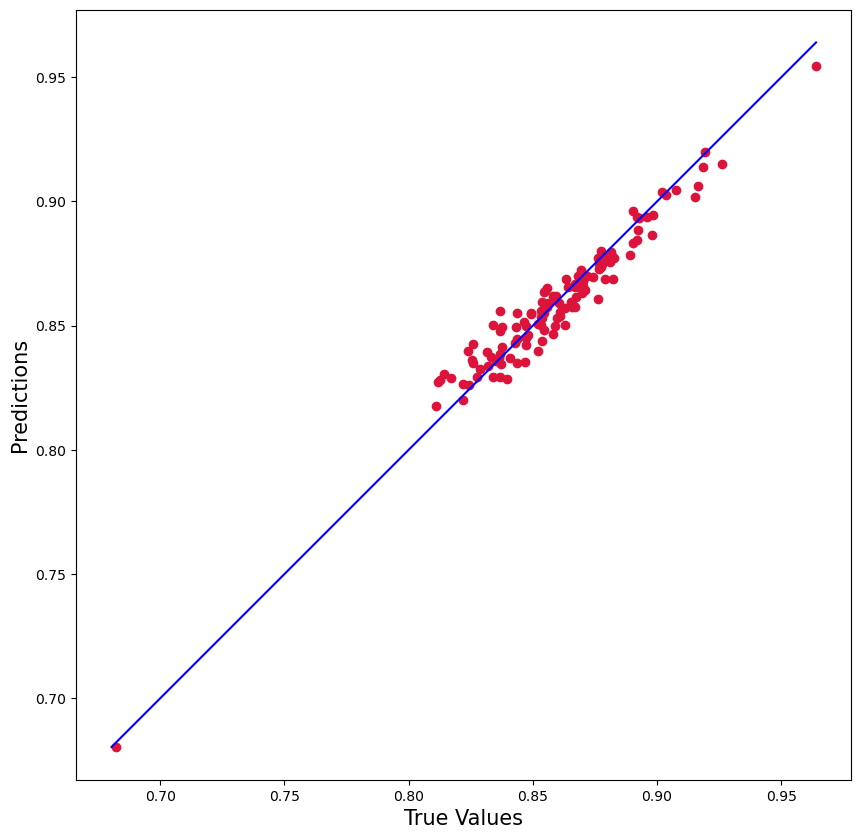

In [66]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, ypred, c='crimson')
#$plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_test), max(ypred))
p2 = min(min(y_test), min(ypred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [67]:
def regrfuncreading(dataset):
    regr = LinearRegression()
    scaler = StandardScaler()
    clm_names = dataset.columns.drop(['AVG_Reading_2022'])
    comp_df = pd.DataFrame(columns = ['K-Features','Selected Features','R2 Scores','Mean Absolute Error','Sqrt MSE'])
    for features in range(1,len(dataset.columns)):
        y = dataset['AVG_Reading_2022']
        x = dataset.drop(['AVG_Reading_2022'], axis=1)
#x.drop(['AVG_Math_2022'])#,'AVG_Reading_2022','Label Math 2019-2022',
#       'Label Reading 2019-2022','Label Overall 2019-2022'],axis=1,inplace=True)
        select = SelectKBest(r_regression,k=features)
        x = select.fit_transform(x,y)
        #  x = SelectKBest(r_regression,k=features).fit_transform(x,y)
        filter = select.get_support()

        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 13)
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        regr.fit(x_train,y_train)
        ypred = regr.predict(x_test)
        print('K-Features: ' + str(features))
        #print('Best Selected K-Features: ' + clm_names[filter])
        print('R2 Score: ' + str(regr.score(x_test,y_test)))
        print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, ypred)))
        print('Root Mean Absolute Error: ' + str(np.sqrt(mean_squared_error(y_test,ypred))))
        comp_df = comp_df.append({'K-Features': features,
                                 'Selected Features' : clm_names[filter],
                                 'R2 Scores':regr.score(x_test,y_test),
                                 'Mean Absolute Error': mean_absolute_error(y_test,ypred),
                                 'Sqrt MSE': np.sqrt(mean_squared_error(y_test,ypred))},
                                ignore_index = True)
        #comp_df.iloc[[features-1,0]] = features
        #comp_df.iloc[[features-1,1]] = regr.score(x_test,ytest)
        #comp_df.iloc[[features-1,2]] = mean_absolute_error(y_test,ypred)
        #comp_df.iloc[[features-1,3]] = np.sqrt(mean_squared_error(y_test,ypred))
    return comp_df
comp_df = regrfuncreading(reg_df)

K-Features: 1
R2 Score: 0.8656149129992221
Mean Absolute Error: 0.006524170005654186
Root Mean Absolute Error: 0.0085473629697199
K-Features: 2
R2 Score: 0.8733348129634032
Mean Absolute Error: 0.006338486432501352
Root Mean Absolute Error: 0.008298225701697122
K-Features: 3
R2 Score: 0.8864768728159974
Mean Absolute Error: 0.005985018490160829
Root Mean Absolute Error: 0.007855951282120095
K-Features: 4
R2 Score: 0.9063424424378292
Mean Absolute Error: 0.005296240484929865
Root Mean Absolute Error: 0.00713555934634577
K-Features: 5
R2 Score: 0.9115961071926126
Mean Absolute Error: 0.00516204817583092
Root Mean Absolute Error: 0.006932538709066386
K-Features: 6
R2 Score: 0.9103433599852937
Mean Absolute Error: 0.00508885479321344
Root Mean Absolute Error: 0.0069814854642895295
K-Features: 7
R2 Score: 0.9123034384432864
Mean Absolute Error: 0.005052983191622242
Root Mean Absolute Error: 0.006904748929977479
K-Features: 8
R2 Score: 0.9159017108631575
Mean Absolute Error: 0.00494212612536

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 20
R2 Score: 0.9373972864915722
Mean Absolute Error: 0.0042768346747452885
Root Mean Absolute Error: 0.005833822183855261
K-Features: 21
R2 Score: 0.9328994647837783
Mean Absolute Error: 0.0043529864413058466
Root Mean Absolute Error: 0.0060397588756188215
K-Features: 22
R2 Score: 0.9312792871656098
Mean Absolute Error: 0.004392683112409743
Root Mean Absolute Error: 0.006112240531390961
K-Features: 23
R2 Score: 0.9286871137426842
Mean Absolute Error: 0.0044668016077363485
Root Mean Absolute Error: 0.006226451586349959
K-Features: 24
R2 Score: 0.9263054248595879
Mean Absolute Error: 0.004492923388505919
Root Mean Absolute Error: 0.006329572347934129
K-Features: 25
R2 Score: 0.9294432535711418
Mean Absolute Error: 0.00448836459436166
Root Mean Absolute Error: 0.006193353678296182
K-Features: 26
R2 Score: 0.9296506049265436
Mean Absolute Error: 0.004483097345995396
Root Mean Absolute Error: 0.006184246504057704
K-Features: 27
R2 Score: 0.9360450221250767
Mean Absolute Error: 0

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 37
R2 Score: 0.9237198052136745
Mean Absolute Error: 0.004772441937421302
Root Mean Absolute Error: 0.00643965358083046
K-Features: 38
R2 Score: 0.9228564842695703
Mean Absolute Error: 0.004802605309169112
Root Mean Absolute Error: 0.006475992279087184
K-Features: 39
R2 Score: 0.922960091769962
Mean Absolute Error: 0.004803202857064145
Root Mean Absolute Error: 0.006471642031363178
K-Features: 40
R2 Score: 0.9209479737299607
Mean Absolute Error: 0.0048468065445235855
Root Mean Absolute Error: 0.006555610040313143
K-Features: 41
R2 Score: 0.9209015203178643
Mean Absolute Error: 0.004849105485693309
Root Mean Absolute Error: 0.006557535896893784
K-Features: 42
R2 Score: 0.9205151587968226
Mean Absolute Error: 0.004866030856803448
Root Mean Absolute Error: 0.006573531736695802
K-Features: 43
R2 Score: 0.9213333910247244
Mean Absolute Error: 0.004845974347396835
Root Mean Absolute Error: 0.006539609611259315
K-Features: 44
R2 Score: 0.9184867192214665
Mean Absolute Error: 0.004

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 55
R2 Score: 0.9029403312060575
Mean Absolute Error: 0.0050992984234044655
Root Mean Absolute Error: 0.007264002936237898
K-Features: 56
R2 Score: 0.9006759215480988
Mean Absolute Error: 0.005118505035634042
Root Mean Absolute Error: 0.007348249278847362
K-Features: 57
R2 Score: 0.8937776003968905
Mean Absolute Error: 0.0051975861106548305
Root Mean Absolute Error: 0.007599143796056039
K-Features: 58
R2 Score: 0.8897321325180909
Mean Absolute Error: 0.00522541559129253
Root Mean Absolute Error: 0.007742497902713617
K-Features: 59
R2 Score: 0.8899241044220348
Mean Absolute Error: 0.005225435316248981
Root Mean Absolute Error: 0.007735755278698392
K-Features: 60
R2 Score: 0.8901480420323525
Mean Absolute Error: 0.005223914398245002
Root Mean Absolute Error: 0.007727882490121322
K-Features: 61
R2 Score: 0.885934520922775
Mean Absolute Error: 0.005226739800183855
Root Mean Absolute Error: 0.007874694658293335
K-Features: 62
R2 Score: 0.8875843849861054
Mean Absolute Error: 0.00

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 73
R2 Score: -1.178211014304659
Mean Absolute Error: 0.009780629837430213
Root Mean Absolute Error: 0.034411736081032734
K-Features: 74
R2 Score: -1.1886453888485469
Mean Absolute Error: 0.009832229248176836
Root Mean Absolute Error: 0.03449405959252327
K-Features: 75
R2 Score: -1.2260036949478899
Mean Absolute Error: 0.009877870797522555
Root Mean Absolute Error: 0.034787206003063065
K-Features: 76
R2 Score: -1.3512324453530624
Mean Absolute Error: 0.010181359064663102
Root Mean Absolute Error: 0.03575233340112218
K-Features: 77
R2 Score: -1.3604307064715062
Mean Absolute Error: 0.010140580197106374
Root Mean Absolute Error: 0.035822198525194485
K-Features: 78
R2 Score: -1.698142497672893
Mean Absolute Error: 0.011243488845091184
Root Mean Absolute Error: 0.038299142443597334
K-Features: 79
R2 Score: -1.7219725173633589
Mean Absolute Error: 0.011307165856533715
Root Mean Absolute Error: 0.038467899837539204
K-Features: 80
R2 Score: -1.7198681315692865
Mean Absolute Error: 

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 88
R2 Score: -0.9737954272102514
Mean Absolute Error: 0.01067186387473631
Root Mean Absolute Error: 0.03275726829792512
K-Features: 89
R2 Score: -1.0031373645330728
Mean Absolute Error: 0.010933066748571672
Root Mean Absolute Error: 0.03299985066256099
K-Features: 90
R2 Score: -1.0184921045563735
Mean Absolute Error: 0.01092830809145571
Root Mean Absolute Error: 0.03312608684211173
K-Features: 91
R2 Score: -0.9249287204280789
Mean Absolute Error: 0.010860560757946284
Root Mean Absolute Error: 0.03234922903169812
K-Features: 92
R2 Score: -0.9174489307311482
Mean Absolute Error: 0.010959141676916462
Root Mean Absolute Error: 0.03228631736658951
K-Features: 93
R2 Score: -0.8321924092719615
Mean Absolute Error: 0.011123695254422115
Root Mean Absolute Error: 0.031560374526411285
K-Features: 94
R2 Score: -1.702835374202905
Mean Absolute Error: 0.01158552149583959
Root Mean Absolute Error: 0.03833243480349294
K-Features: 95
R2 Score: -1.6943397072715296
Mean Absolute Error: 0.0115

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 104
R2 Score: -2.005613037777907
Mean Absolute Error: 0.011760880378901455
Root Mean Absolute Error: 0.04042249737783651
K-Features: 105
R2 Score: -1.9977856570333254
Mean Absolute Error: 0.011747937493353629
Root Mean Absolute Error: 0.04036982783250309
K-Features: 106
R2 Score: -1.895878853202603
Mean Absolute Error: 0.011683686502800184
Root Mean Absolute Error: 0.039677728678370966
K-Features: 107
R2 Score: -2.282058845516127
Mean Absolute Error: 0.01217061918600163
Root Mean Absolute Error: 0.04224057197388434
K-Features: 108
R2 Score: -1.545428391874966
Mean Absolute Error: 0.0130526352893372
Root Mean Absolute Error: 0.03719949554490122
K-Features: 109
R2 Score: -0.6242944954262619
Mean Absolute Error: 0.01161181688276423
Root Mean Absolute Error: 0.02971590729658759
K-Features: 110
R2 Score: -0.6357826562382718
Mean Absolute Error: 0.011852027658624838
Root Mean Absolute Error: 0.029820808109104993
K-Features: 111
R2 Score: -0.5695208364716875
Mean Absolute Error: 0

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 119
R2 Score: -0.8739555533292123
Mean Absolute Error: 0.012099864806204655
Root Mean Absolute Error: 0.03191804271380492
K-Features: 120
R2 Score: -0.8130681831247708
Mean Absolute Error: 0.011898344256831067
Root Mean Absolute Error: 0.03139523056986282
K-Features: 121
R2 Score: -0.9571106036643078
Mean Absolute Error: 0.012210249835893524
Root Mean Absolute Error: 0.032618523127159814
K-Features: 122
R2 Score: -0.9784080802136415
Mean Absolute Error: 0.012272772890099171
Root Mean Absolute Error: 0.03279552194265578
K-Features: 123
R2 Score: -0.9804928898244989
Mean Absolute Error: 0.012274739158423394
Root Mean Absolute Error: 0.03281279704810833
K-Features: 124
R2 Score: -1.0159424111646045
Mean Absolute Error: 0.012140733370414662
Root Mean Absolute Error: 0.033105158334738545
K-Features: 125
R2 Score: -1.0272623605411524
Mean Absolute Error: 0.012151834010450585
Root Mean Absolute Error: 0.03319797450661994
K-Features: 126
R2 Score: -1.022314679362263
Mean Absolute E

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 134
R2 Score: -1.0885450334052096
Mean Absolute Error: 0.013570981524659806
Root Mean Absolute Error: 0.03369601404799653
K-Features: 135
R2 Score: -1.2014730169385377
Mean Absolute Error: 0.013621153495485682
Root Mean Absolute Error: 0.03459499657500579
K-Features: 136
R2 Score: -1.203673975488286
Mean Absolute Error: 0.013548405661046845
Root Mean Absolute Error: 0.03461228571080759
K-Features: 137
R2 Score: -1.1720238704757229
Mean Absolute Error: 0.013504140907340518
Root Mean Absolute Error: 0.034362828568023425
K-Features: 138
R2 Score: -1.6565052724939227
Mean Absolute Error: 0.014380035040694225
Root Mean Absolute Error: 0.038002480923050856
K-Features: 139
R2 Score: -1.5479720854251484
Mean Absolute Error: 0.01436029698431262
Root Mean Absolute Error: 0.03721807797469726
K-Features: 140
R2 Score: -1.476864943821306
Mean Absolute Error: 0.014021271926645276
Root Mean Absolute Error: 0.03669507433244845
K-Features: 141
R2 Score: -1.5088760786289641
Mean Absolute Err

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 147
R2 Score: -1.0878434727122253
Mean Absolute Error: 0.013644055395895187
Root Mean Absolute Error: 0.033690354178535754
K-Features: 148
R2 Score: -1.0081305421557736
Mean Absolute Error: 0.013524267269009542
Root Mean Absolute Error: 0.03304095407472495
K-Features: 149
R2 Score: -0.9370013905850798
Mean Absolute Error: 0.01356103536930569
Root Mean Absolute Error: 0.03245051359767694
K-Features: 150
R2 Score: -1.0987042767983803
Mean Absolute Error: 0.013741493597602131
Root Mean Absolute Error: 0.03377786785546689
K-Features: 151
R2 Score: -0.996522422618535
Mean Absolute Error: 0.01351050997511533
Root Mean Absolute Error: 0.032945318054523824
K-Features: 152
R2 Score: -1.1289735474248745
Mean Absolute Error: 0.014066754905707529
Root Mean Absolute Error: 0.034020582179801265
K-Features: 153
R2 Score: -1.7210861979166112
Mean Absolute Error: 0.014419287098480532
Root Mean Absolute Error: 0.0384616364341804
K-Features: 154
R2 Score: -1.6706358394918155
Mean Absolute Err

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 159
R2 Score: -1.7681701557689018
Mean Absolute Error: 0.014240978209755227
Root Mean Absolute Error: 0.0387929672352758
K-Features: 160
R2 Score: -1.792371482430517
Mean Absolute Error: 0.014260268268251783
Root Mean Absolute Error: 0.03896217615942149
K-Features: 161
R2 Score: -1.7196055771193226
Mean Absolute Error: 0.01415860712397783
Root Mean Absolute Error: 0.038451170972338314
K-Features: 162
R2 Score: -1.7328500807760623
Mean Absolute Error: 0.014172234712179141
Root Mean Absolute Error: 0.03854468603031391
K-Features: 163
R2 Score: -1.654277023217675
Mean Absolute Error: 0.01401978130785647
Root Mean Absolute Error: 0.0379865395345829
K-Features: 164
R2 Score: -1.640425727998927
Mean Absolute Error: 0.014260380767671292
Root Mean Absolute Error: 0.03788729386270319
K-Features: 165
R2 Score: -1.664598854717517
Mean Absolute Error: 0.014433362035692576
Root Mean Absolute Error: 0.03806032802956906
K-Features: 166
R2 Score: -1.6531130580033868
Mean Absolute Error: 0.

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 171
R2 Score: -1.6941058111584155
Mean Absolute Error: 0.014465072028002166
Root Mean Absolute Error: 0.038270482078168334
K-Features: 172
R2 Score: -1.7315457704786557
Mean Absolute Error: 0.014551530820371266
Root Mean Absolute Error: 0.03853548680067188
K-Features: 173
R2 Score: -1.688968466983924
Mean Absolute Error: 0.014546325473182553
Root Mean Absolute Error: 0.03823397600364353
K-Features: 174
R2 Score: -1.7030767337770407
Mean Absolute Error: 0.014624378729823709
Root Mean Absolute Error: 0.03833414628279569
K-Features: 175
R2 Score: -1.6266757773520122
Mean Absolute Error: 0.01467553753336982
Root Mean Absolute Error: 0.037788516534236906
K-Features: 176
R2 Score: -1.693079794209781
Mean Absolute Error: 0.014725723306625886
Root Mean Absolute Error: 0.03826319396381469
K-Features: 177
R2 Score: -1.711001530966079
Mean Absolute Error: 0.014772955086792116
Root Mean Absolute Error: 0.03839029859174093
K-Features: 178
R2 Score: -1.6122192825623154
Mean Absolute Erro

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 182
R2 Score: -1.6029917063796777
Mean Absolute Error: 0.014947333670473417
Root Mean Absolute Error: 0.03761776601228093
K-Features: 183
R2 Score: -1.6050773374467822
Mean Absolute Error: 0.014953057761758282
Root Mean Absolute Error: 0.03763283349632588
K-Features: 184
R2 Score: -1.6152717431513701
Mean Absolute Error: 0.014939627026913744
Root Mean Absolute Error: 0.037706395569181414
K-Features: 185
R2 Score: -1.5918202930792988
Mean Absolute Error: 0.014901552402013967
Root Mean Absolute Error: 0.03753695602030416
K-Features: 186
R2 Score: -1.582161526328318
Mean Absolute Error: 0.014889791567212676
Root Mean Absolute Error: 0.03746694747893709
K-Features: 187
R2 Score: -1.693806173668876
Mean Absolute Error: 0.015104655469237838
Root Mean Absolute Error: 0.0382683538042917
K-Features: 188
R2 Score: -1.5150862371820817
Mean Absolute Error: 0.014905251278127096
Root Mean Absolute Error: 0.036977117125928126
K-Features: 189
R2 Score: -1.5129277063277318
Mean Absolute Err

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 193
R2 Score: -1.4432175267094767
Mean Absolute Error: 0.014670158071744705
Root Mean Absolute Error: 0.036444976636696984
K-Features: 194
R2 Score: -1.4305325331782925
Mean Absolute Error: 0.014605199039808343
Root Mean Absolute Error: 0.036350243786975996
K-Features: 195
R2 Score: -1.4091157094321303
Mean Absolute Error: 0.014560123970492476
Root Mean Absolute Error: 0.03618973794734416
K-Features: 196
R2 Score: -1.4648348854665882
Mean Absolute Error: 0.014569086692640433
Root Mean Absolute Error: 0.036605852428717986
K-Features: 197
R2 Score: -1.440820843752327
Mean Absolute Error: 0.014517916624751197
Root Mean Absolute Error: 0.03642709683582214
K-Features: 198
R2 Score: -1.4225921608530223
Mean Absolute Error: 0.01442295212082965
Root Mean Absolute Error: 0.03629081841648001
K-Features: 199
R2 Score: -1.3523856966736019
Mean Absolute Error: 0.014325402630067582
Root Mean Absolute Error: 0.03576110037164189
K-Features: 200
R2 Score: -1.3237095915419594
Mean Absolute E

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 205
R2 Score: -1.5247300184823351
Mean Absolute Error: 0.015580700559562672
Root Mean Absolute Error: 0.037047941347677825
K-Features: 206
R2 Score: -1.4347858152323951
Mean Absolute Error: 0.015485875462969024
Root Mean Absolute Error: 0.036382035227333714
K-Features: 207
R2 Score: -1.4687166071167446
Mean Absolute Error: 0.015519181402503822
Root Mean Absolute Error: 0.036634665277603416
K-Features: 208
R2 Score: -1.4686859158887167
Mean Absolute Error: 0.015519975297944516
Root Mean Absolute Error: 0.036634437554754005
K-Features: 209
R2 Score: -1.4422888453168414
Mean Absolute Error: 0.015451637872686429
Root Mean Absolute Error: 0.03643804950308255
K-Features: 210
R2 Score: -1.3274931507673435
Mean Absolute Error: 0.014978885698124004
Root Mean Absolute Error: 0.03557138821624604
K-Features: 211
R2 Score: -1.320922594584966
Mean Absolute Error: 0.014940292645604
Root Mean Absolute Error: 0.03552114338747383
K-Features: 212
R2 Score: -2.8303111497041624
Mean Absolute Er

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 216
R2 Score: -2.329055627109892
Mean Absolute Error: 0.01727284087152806
Root Mean Absolute Error: 0.042541924706152486
K-Features: 217
R2 Score: -2.2953101575211345
Mean Absolute Error: 0.017221625260467825
Root Mean Absolute Error: 0.04232575922553893
K-Features: 218
R2 Score: -2.7158570205751484
Mean Absolute Error: 0.018601054269338804
Root Mean Absolute Error: 0.0449454885972226
K-Features: 219
R2 Score: -2.720660594332551
Mean Absolute Error: 0.018611871369093338
Root Mean Absolute Error: 0.04497453024750913
K-Features: 220
R2 Score: -3.934606846929224
Mean Absolute Error: 0.020131994234463015
Root Mean Absolute Error: 0.051794409614042865
K-Features: 221
R2 Score: -3.8442369689123614
Mean Absolute Error: 0.020128342890553697
Root Mean Absolute Error: 0.05131794989721147
K-Features: 222
R2 Score: -3.8158546809310963
Mean Absolute Error: 0.020085761236066254
Root Mean Absolute Error: 0.05116739362318517
K-Features: 223
R2 Score: -4.066654469816797
Mean Absolute Error:

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 226
R2 Score: -3.079100702304096
Mean Absolute Error: 0.019721282950058188
Root Mean Absolute Error: 0.04709109857393968
K-Features: 227
R2 Score: -3.0791006783993895
Mean Absolute Error: 0.019721282904918896
Root Mean Absolute Error: 0.047091098435955964
K-Features: 228
R2 Score: -3.0787151937624415
Mean Absolute Error: 0.01979264468842165
Root Mean Absolute Error: 0.04708887327343751
K-Features: 229
R2 Score: -3.253030609080046
Mean Absolute Error: 0.02009274610109957
Root Mean Absolute Error: 0.04808458395599894
K-Features: 230
R2 Score: -3.5788623433680673
Mean Absolute Error: 0.020484669402073257
Root Mean Absolute Error: 0.04989251564965679
K-Features: 231
R2 Score: -4.187716856975579
Mean Absolute Error: 0.021471569041283327
Root Mean Absolute Error: 0.05310614058336491
K-Features: 232
R2 Score: -4.330164826175611
Mean Absolute Error: 0.021623038395113318
Root Mean Absolute Error: 0.05383031585432965
K-Features: 233
R2 Score: -4.420172591736931
Mean Absolute Error: 0

C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

K-Features: 235
R2 Score: -3.284906776947423
Mean Absolute Error: 0.020549126382684677
Root Mean Absolute Error: 0.04826444287958008
K-Features: 236
R2 Score: -3.497634383912261
Mean Absolute Error: 0.020827490891137324
Root Mean Absolute Error: 0.04944799455583977
K-Features: 237
R2 Score: -3.191181104667362
Mean Absolute Error: 0.020439164916535624
Root Mean Absolute Error: 0.04773366955568343
K-Features: 238
R2 Score: -2.9145396390129275
Mean Absolute Error: 0.02034236770331782
Root Mean Absolute Error: 0.0461314341302954


C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp_df.append({'K-Features': features,
C:\Users\Daniel Payan\AppData\Local\Temp\ipykernel_2040\3087464296.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comp_df = comp

In [68]:
comp_df

,K-Features,Selected Features,R2 Scores,Mean Absolute Error,Sqrt MSE
0,1,"Index(['AVG_Reading_2021'], dtype='object')",0.865615,0.006524,0.008547
1,2,Index(['Average Score Reading All Grade 6 2020...,0.873335,0.006338,0.008298
2,3,Index(['Average Score Reading All Grade 6 2020...,0.886477,0.005985,0.007856
3,4,Index(['Average Score Reading All Grade 6 2020...,0.906342,0.005296,0.007136
4,5,Index(['Average Score Reading All Grade 4 2020...,0.911596,0.005162,0.006933
...,...,...,...,...,...
233,234,"Index(['ESSER-SUPP 22 NORM', 'ESSER-SUPP 23 NO...",-3.200409,0.020405,0.047786
234,235,"Index(['ESSER-SUPP 22 NORM', 'ESSER-SUPP 23 NO...",-3.284907,0.020549,0.048264
235,236,"Index(['ARP ESSER III 21 NORM', 'ESSER-SUPP 22...",-3.497634,0.020827,0.049448
236,237,"Index(['CRRSA ESSER II 21 NORM', 'ARP ESSER II...",-3.191181,0.020439,0.047734


In [69]:
comp_df.sort_values(by=['R2 Scores'], ascending=False)

,K-Features,Selected Features,R2 Scores,Mean Absolute Error,Sqrt MSE
10,11,Index(['Average Score Reading All Grade 7 2018...,0.944725,0.003997,0.005482
15,16,Index(['Average Score Math All Grade 6 2020-20...,0.940379,0.004064,0.005693
14,15,Index(['Average Score Math All Grade 6 2020-20...,0.940117,0.004080,0.005706
12,13,Index(['Average Score Reading All Grade 6 2018...,0.939237,0.004117,0.005747
13,14,Index(['Average Score Reading All Grade 4 2018...,0.938693,0.004134,0.005773
...,...,...,...,...,...
223,224,"Index(['ESSER-SUPP 22 NORM', 'ESSER-SUPP 23 NO...",-4.054101,0.020471,0.052418
222,223,"Index(['ESSER-SUPP 22 NORM', 'ESSER-SUPP 23 NO...",-4.066654,0.020495,0.052483
230,231,"Index(['ESSER-SUPP 22 NORM', 'ESSER-SUPP 23 NO...",-4.187717,0.021472,0.053106
231,232,"Index(['ESSER-SUPP 22 NORM', 'ESSER-SUPP 23 NO...",-4.330165,0.021623,0.053830


In [70]:
y = reg_df['AVG_Reading_2022']
x = reg_df.drop(['AVG_Reading_2022'], axis=1)
regr = LinearRegression()
scaler = StandardScaler()
select = SelectKBest(r_regression,k=11)
x = select.fit_transform(x,y)
filter = select.get_support()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 13)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

regr.fit(x_train,y_train)
ypred = regr.predict(x_test)
#print('K-Features: ' + str(features))
#print('Best Selected K-Features: ' + clm_names[filter])
print('R2 Score: ' + str(regr.score(x_test,y_test)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, ypred)))
print('Root Mean Absolute Error: ' + str(np.sqrt(mean_squared_error(y_test,ypred))))
reading_df = pd.DataFrame({'Actual':y_test, 'Predicted':ypred}).reset_index()

        #comp_df2.iloc[[features-1,0]] = features
        #comp_df2.iloc[[features-1,1]] = regr.score(x_test,ytest)
        #comp_df2.iloc[[features-1,2]] = mean_absolute_error(y_test,ypred)
        #comp_df2.iloc[[features-1,3]] = np.sqrt(mean_squared_error(y_test,ypred))
        #omp_df2 = regrfuncreading(reg_df)

R2 Score: 0.9447250771456928
Mean Absolute Error: 0.003997368781877579
Root Mean Absolute Error: 0.005481768376023826


In [71]:
reading_df

,index,Actual,Predicted
0,162,0.922115,0.922424
1,69,0.904455,0.904710
2,204,0.932652,0.939498
3,77,0.911193,0.915091
4,159,0.892418,0.892531
...,...,...,...
120,437,0.912901,0.913687
121,210,0.926823,0.926429
122,273,0.923001,0.929208
123,274,0.888831,0.888920


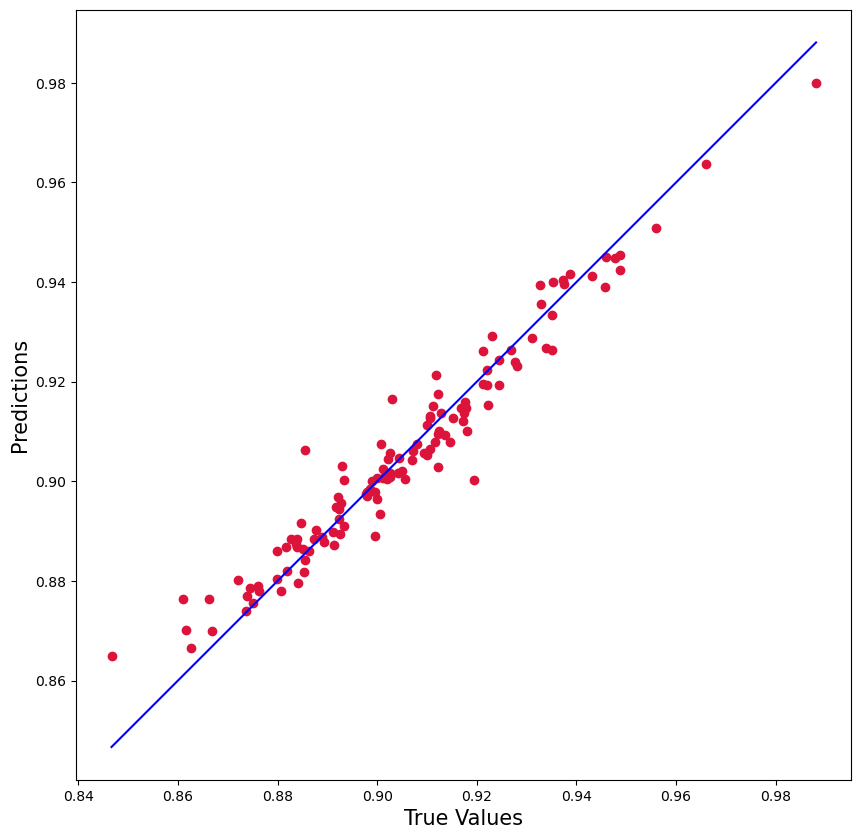

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, ypred, c='crimson')
#$plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_test), max(ypred))
p2 = min(min(y_test), min(ypred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()